https://programmers.co.kr/learn/courses/30/lessons/42579?language=python3

## 문제 설명
스트리밍 사이트에서 장르 별로 가장 많이 재생된 노래를 두 개씩 모아 베스트 앨범을 출시하려 합니다. 노래는 고유 번호로 구분하며, 노래를 수록하는 기준은 다음과 같습니다.

1. 속한 노래가 많이 재생된 장르를 먼저 수록합니다.
2. 장르 내에서 많이 재생된 노래를 먼저 수록합니다.
3. 장르 내에서 재생 횟수가 같은 노래 중에서는 고유 번호가 낮은 노래를 먼저 수록합니다.

노래의 장르를 나타내는 문자열 배열 genres와 노래별 재생 횟수를 나타내는 정수 배열 plays가 주어질 때, 베스트 앨범에 들어갈 노래의 고유 번호를 순서대로 return 하도록 solution 함수를 완성하세요.

## 제한사항
- genres[i]는 고유번호가 i인 노래의 장르입니다.
- plays[i]는 고유번호가 i인 노래가 재생된 횟수입니다.
- genres와 plays의 길이는 같으며, 이는 1 이상 10,000 이하입니다.
- 장르 종류는 100개 미만입니다.
- 장르에 속한 곡이 하나라면, 하나의 곡만 선택합니다.
- 모든 장르는 재생된 횟수가 다릅니다.

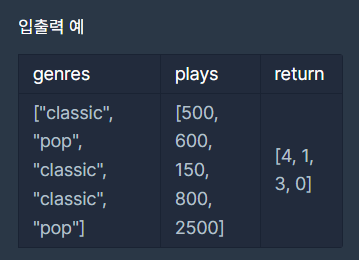

## 입출력 예 설명
classic 장르는 1,450회 재생되었으며, classic 노래는 다음과 같습니다.

- 고유 번호 3: 800회 재생
- 고유 번호 0: 500회 재생
- 고유 번호 2: 150회 재생

pop 장르는 3,100회 재생되었으며, pop 노래는 다음과 같습니다.

- 고유 번호 4: 2,500회 재생
- 고유 번호 1: 600회 재생

따라서 pop 장르의 [4, 1]번 노래를 먼저, classic 장르의 [3, 0]번 노래를 그다음에 수록합니다.

In [145]:
genres = ["classic", "pop", "classic", "classic", "pop"]
plays = [500, 600, 150, 800, 2500]


In [151]:
genres = ["classic", "pop", "classic", "classic", "pop", "zazz", "zazz"]
plays = [500, 600, 150, 800, 2500, 2000, 6000]

In [152]:
answer = []

In [153]:
record = {} # 장르별 총 재생 수 저장
index = {} # 장르에 인덱스 붙여서 저장

In [154]:
indx = 0
for i, genre in enumerate(genres): 
    if genre in record: # record 에 저장된 장르 있으면
        record[genre] = record[genre] + plays[i] # 기존 재생 수 + 현재 i번의 재생 수
    else: # 없으면
        record[genre] = plays[i] #record에 추가
        index[genre] = indx # 장르에 인덱스 부여
        indx += 1 # 인덱스 증가
    print(record, index, indx)
    print()

{'classic': 500} {'classic': 0} 1

{'classic': 500, 'pop': 600} {'classic': 0, 'pop': 1} 2

{'classic': 650, 'pop': 600} {'classic': 0, 'pop': 1} 2

{'classic': 1450, 'pop': 600} {'classic': 0, 'pop': 1} 2

{'classic': 1450, 'pop': 3100} {'classic': 0, 'pop': 1} 2

{'classic': 1450, 'pop': 3100, 'zazz': 2000} {'classic': 0, 'pop': 1, 'zazz': 2} 3

{'classic': 1450, 'pop': 3100, 'zazz': 8000} {'classic': 0, 'pop': 1, 'zazz': 2} 3



In [155]:
record, index

({'classic': 1450, 'pop': 3100, 'zazz': 8000},
 {'classic': 0, 'pop': 1, 'zazz': 2})

In [110]:
from collections import deque
record = deque(sorted(record.items(), reverse=True, key=lambda x:x[1]))
record

deque([('pop', 3100), ('classic', 1450)])

In [111]:
output = [[] for _ in range(len(index))] # 재생 수와 노래번호 index에 저장된 장르 인덱스에 저장
output

[[], []]

In [112]:
i = 0
for genre, play in zip(genres, plays):
    output[index.get(genre)].append((play, i)) #index에 저장된 장르 인덱스에 재생수와 번호 넣기
    i += 1

In [116]:
output # 0번 인덱스는 classic, 1번 인덱슨느 pop

[[(500, 0), (150, 2), (800, 3)], [(600, 1), (2500, 4)]]

In [114]:
while record:
    genre, _ = record.popleft() # 누적 재생 수 높은 장르 부터
    answer.extend(list(map(lambda x:x[1], sorted(output[index.get(genre)], reverse=True, key=lambda x:(x[0],x[1]))[:2])))
    # output의 해당 genre 인덱스를 재생수기준으로 오름차순 정렬 후 2번까지 슬라이싱, 
    # map() 사용해서 해당 노래의 번호만 answer에 append

In [115]:
answer

[4, 1, 3, 0, 2]

In [117]:
sorted(output[index.get(genre)], reverse=True, key=lambda x:(x[0],x[1]))[:2]

[(800, 3), (500, 0)]

solution

In [161]:
def solution(genres, plays):
    answer = []

    record = {} # 장르별 총 재생 수 저장
    index = {} # 장르에 인덱스 붙여서 저장

    indx = 0
    for i, genre in enumerate(genres): 
        if genre in record: # record 에 저장된 장르 있으면
            record[genre] = record[genre] + plays[i] # 기존 재생 수 + 현재 i번의 재생 수
        else: # 없으면
            record[genre] = plays[i] #record에 추가
            index[genre] = indx # 장르에 인덱스 부여
            indx += 1 # 인덱스 증가

    output = [[] for _ in range(len(index))] # 재생 수와 노래번호 index에 저장된 장르 인덱스에 저장
    i = 0
    for genre, play in zip(genres, plays):
        output[index.get(genre)].append((play, i)) #index에 저장된 장르 인덱스에 재생수와 번호 넣기
        i += 1

    from collections import deque
    record = deque(sorted(record.items(), reverse=True, key=lambda x:x[1]))    
    while record:
        genre, _ = record.popleft() # 누적 재생 수 높은 장르 부터
        answer.extend(list(map(lambda x:x[1], sorted(output[index.get(genre)], reverse=True, key=lambda x:(x[0],-x[1]))[:2])))
        # output의 해당 genre 인덱스를 재생수기준으로 오름차순 정렬 후 2번까지 슬라이싱, 
        # map() 사용해서 해당 노래의 번호만 answer에 append   
    
    return answer

In [162]:
genres = ["classic", "pop", "classic", "pop", "classic", "classic"]
plays = [1950, 600, 500, 2500, 500, 150]

In [163]:
solution(genres, plays)

[0, 2, 3, 1]